# Representing a Solution

In [1]:
# We first import some resources
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from numpy import *
from PyGMO import *
from Trajectory import *
from Optimisation import *

In [2]:
# Initialise a model and problem
model = Point_Lander()
prob  = Hermite_Simpson_Seperated(model)

In [3]:
# Load the base decision vector
basepath = '../Data/Hermite_Simpson_Seperated/20Seg/'
fname    = basepath + 'HSS_20_Base.npy'
z = load(fname)

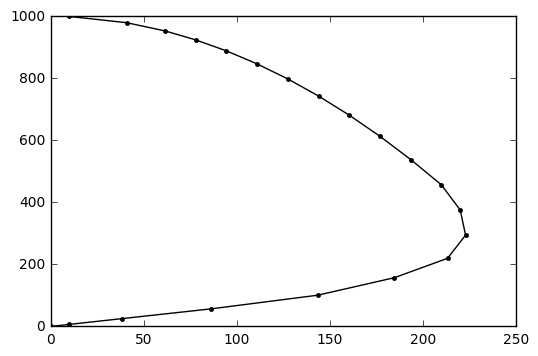

In [4]:
# Visualise initial decision
tf, sb, cb, s, c = prob.Decode(z)
plt.plot(s[:,0], s[:,1], 'k.-')
plt.show()

In [5]:
# We generate a list of random initial states
ntraj = 10000
sil = []
rl = []
for i in range(ntraj):
    state = random.random()*(model.siub - model.silb) + model.silb
    sil.append(state)
    # We compute the norm of position and velocity
    r = linalg.norm(state[0:4])
    rl.append(r)
# We compute the indicies of the sorted distances
seq = argsort(rl)
sil = array(sil)
sil = sil[seq]

In [ ]:
# Use SLSQP
algo = algorithm.scipy_slsqp(max_iter=5000, screen_output=True)

In [ ]:
# We then iteratively optimise for each initial state
for i in range(ntraj):
    # Instantiate the model
    model = Point_Lander(sil[i])
    # Instantiate the problem
    prob  = Hermite_Simpson_Seperated(model, nsegs=20)
    # Create an empty population
    pop = population(prob)
    # Add the previous decision vectory (continuation)
    pop.push_back(z)
    # Evolve the trajectory
    pop = algo.evolve(pop)
    # The filename for the trajectory
    fname = basepath + 'HSS_20_' + str(i)
    # Extract decision for next loop
    z = pop.champion.x
    # Save the solution for the database!
    save(fname, z)

  NIT    FC           OBJFUN            GNORM
    1   331    -9.244030E+03     1.000000E+00
    2   662    -9.243707E+03     1.000000E+00
    3   993    -9.242096E+03     1.000000E+00
    4  1324    -9.234454E+03     1.000000E+00
    5  1655    -9.203108E+03     1.000000E+00
    6  1986    -9.186183E+03     1.000000E+00
    7  2317    -9.161133E+03     1.000000E+00
    8  2648    -9.149539E+03     1.000000E+00
    9  2979    -9.130920E+03     1.000000E+00
   10  3310    -9.088131E+03     1.000000E+00
   11  3641    -9.066346E+03     1.000000E+00
   12  3972    -9.050870E+03     1.000000E+00
   13  4303    -9.046684E+03     1.000000E+00
   14  4634    -9.037919E+03     1.000000E+00
   15  4965    -9.002132E+03     1.000000E+00
   16  5296    -8.992017E+03     1.000000E+00
   17  5627    -8.966369E+03     1.000000E+00
   18  5958    -8.964084E+03     1.000000E+00
   19  6289    -8.956791E+03     1.000000E+00
   20  6620    -8.948277E+03     1.000000E+00
   21  6951    -8.919836E+03     1